## Phase III: First ML Proof of Concept
### What makes YouTube Videos popular?

#### Group: Yipeng Wang, Ruoxi Wang, Yuyang Du, Karan Mor, DS 3000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import seaborn as sns
sns.set()

## The Implementation (using NumPy) of the first ML model

In our first machine learning model, we decided to use a regression approach. In Phase III, we experimented with different types of regression models to figure out the best way to predict the like count based on our data. We collected data from 50 videos over 30 sessions, taking counts of views, likes, and comments each hour. Initially, we tried to directly fit a regression line using view count and time as an index, but this led to a very high Mean Squared Error (MSE) because time can't really be considered a meaningful factor in predicting likes. For example, the view count of video 1 is obviously unrelated to the comment count of video 2, so including time in this way made the predictions inaccurate. To address this, we chose to regress features like views and comments separately for each video at each session. We then used simple linear regression to create relationships between "views and likes" and "comments and likes." After evaluating the models, we looked at their R² and MSE values and realized that a multiple regression model would actually be better since we have multiple features to consider. This gave us a more complete and accurate way of predicting the like count, and it became the foundation of our project. 



In [2]:
# Load the dataset
df = pd.read_csv('Final_30_sessions_re_categorize.csv')  

In [3]:
print(df.head())  # Display first few rows
print(df.info())  # Summary of the dataset

      Video ID  Session  View Count  Like Count  Comment Count Video Category  \
0  mb5ldcr1jbA        1      273046        1273              0           Info   
1  rtLGwJF9Jxc        1       93939         568              0     Recreation   
2  HAOgdVdSSkA        1      647685           0              6           Info   
3  WWeOBvAvwrY        1       41646        6085            998           Info   
4  WunqF6zQnbI        1       52315        1747             27           Info   

    Video Published At  
0  2024-10-21 19:10:34  
1  2024-10-21 18:45:33  
2  2024-10-21 18:41:24  
3  2024-10-21 18:31:26  
4  2024-10-21 18:10:08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video ID            1481 non-null   object
 1   Session             1481 non-null   int64 
 2   View Count          1481 non-null   int64 
 3   Like Count  

In [4]:
# add a 1 column to X
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): added bias column of 1s for us to calculate intercept later
    """
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])

    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew


In [5]:
# function that calculates the line of best fit using formula
def line_of_best_fit(X, y):
    """
    Calculate the coefficients for the line of best fit, including the intercept term.

    Args:
    X (array): Predictor values (1-d or 2-d array, not including bias term).
    y (array): Response values corresponding to X.

    Returns:
    coeff (array): Vector containing the coefficients for the line of best fit, including intercept.
    """
    # Add a bias column to X
    X_bias = add_bias_column(X)

    # Use the normal equation to calculate the coefficients
    # coeff = (X.T * X)^(-1) * X.T * y
    XTX = np.dot(X_bias.T, X_bias)
    XTy = np.dot(X_bias.T, y)
    coeff = np.linalg.solve(XTX, XTy)

    return coeff


In [6]:
# Function to calculate predictions, residuals, MSE, and R^2 for linear regression
def linreg_predict(Xnew, ynew, m):
    """
    Make predictions and evaluate the performance of a linear regression model.

    Args:
    Xnew (array): Predictor values (1-d or 2-d array, not including bias term).
    ynew (array): Actual response values corresponding to Xnew.
    m (array): Coefficients from the line_of_best_fit function, including intercept.

    Returns:
    dict: A dictionary with the following keys:
        'ypreds' (array): Predicted values from applying m to Xnew.
        'resids' (array): Residuals, the differences between ynew and ypreds.
        'mse' (float): Mean squared error.
        'r2' (float): Coefficient of determination (R²).
    """
    # Add a bias column to Xnew
    Xnew_bias = add_bias_column(Xnew)
    
    # yhat: Calculate predicted values
    ypreds = np.dot(Xnew_bias, m)
    
    # Calculate residuals
    resids = ynew - ypreds
    
    # Calculate Mean Squared Error
    mse = np.mean(resids ** 2)
    
    # Calculate R-squared value
    r2 = r2_score(ynew, ypreds)
  
    return {
        'ypreds': ypreds,
        'resids': resids,
        'mse': mse,
        'r2': r2
    }


In [7]:
# Select features and target
X = df['Session']  # Use 'Session' as the time-based feature
y = df['View Count']  # Target variablee

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model using line_of_best_fit function
coefficients = line_of_best_fit(X_train, y_train)
slope = coefficients[1]  # Second element is the slope
intercept = coefficients[0]  # First element is the intercept

# Predict and evaluate using linreg_predict function
results = linreg_predict(X_test, y_test, coefficients)

# Print MSE and R^2 values for evaluation
print("Mean Squared Error (MSE):", results['mse'])
print("R^2 Score:", results['r2'])

Mean Squared Error (MSE): 597959884705.033
R^2 Score: 0.00462137662843376


In [9]:
# Plot the fit for the full dataset
def show_fit(X, y, slope, intercept):
    plt.figure()
    # Flatten the input data if necessary
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    # Plot the actual data points
    plt.scatter(x, y, label='data', alpha=0.4)
    # Compute linear predictions
    y_pred = slope * x + intercept
    # Plot the linear fit
    plt.plot(x, y_pred, color='black', linestyle='-', label='linear fit')
    plt.legend()
    plt.xlabel('Session')
    plt.ylabel('View Count')
    # Calculate and display the mean squared error
    mse = np.mean((y - y_pred) ** 2)
    plt.title(f'Best Fit Line: y = {intercept:.3f} + {slope:.3f}x\nMSE = {mse:.3f}')
    plt.show()

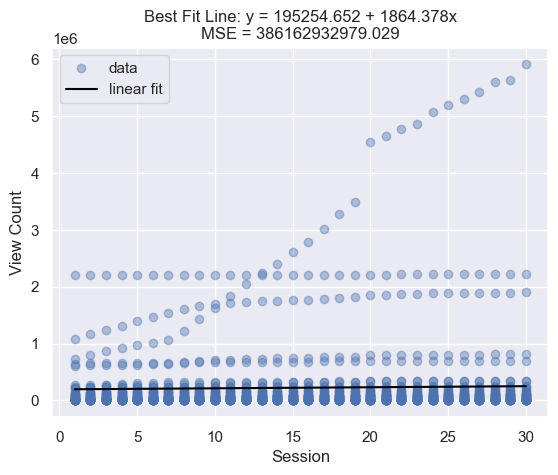

In [10]:
show_fit(X, y, slope, intercept)

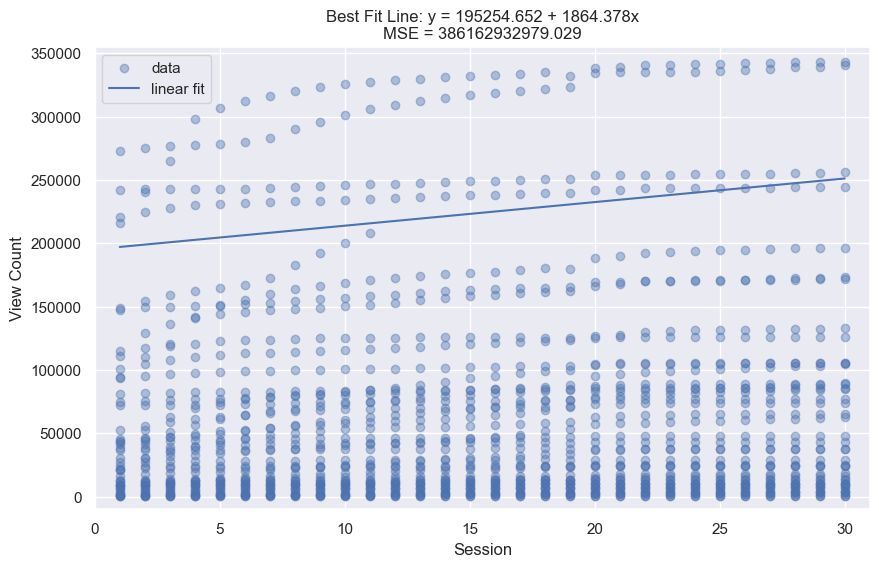

In [11]:
# Plot the fit with rescaled axes
def show_fit_rescaled(X, y, slope, intercept):
    plt.figure(figsize=(10, 6))
    # Flatten the input data if necessary
    x = np.array(X).ravel()
    y = np.array(y).ravel()

    # Plot the actual data points
    plt.scatter(x, y, label='data', alpha=0.4)

    # Compute linear predictions
    y_pred = slope * x + intercept

    # Plot the linear fit
    plt.plot(x, y_pred, linestyle='-', label='linear fit')

    # Set limits to zoom 
    plt.xlim([0, 31])  
    plt.ylim([-10**4, 10**5.55])

    plt.legend()
    plt.xlabel('Session')
    plt.ylabel('View Count')

    # Calculate and display the mean squared error
    mse = np.mean((y - y_pred) ** 2)
    plt.title(f'Best Fit Line: y = {intercept:.3f} + {slope:.3f}x\nMSE = {mse:.3f}')
    plt.show()

# Call the updated plotting function
show_fit_rescaled(X, y, slope, intercept)

As you can see, time simply can't consider as a factor of a regression model. This will create a super high MSE because the view from video1 is obviously not realted to the comments in video 2. In this case, let's directly regress features outside of time for each video at each setion. Then we will try use different types of regression model to see how we can best predict like count spotted from our data.

In [12]:
# Load the dataset
# Here is our revised cleaned data csv which have 1500 videos and their view, likes and comments.
df1500 = pd.read_csv('YP_Youtube_1500_Videos.csv')  

#### Linear Regression Model
First we will try to use a linear regression model as our first ML model. Then we use view count to predict like count and use comment count to predict like count.

In [13]:
X_view_like = df1500[['View Count']].to_numpy()
y_like = df1500['Like Count'].to_numpy()
X_comment_like = df1500[['Comment Count']].to_numpy()
y_like2 = df1500['Like Count'].to_numpy()

In [14]:
# Define all feature-target combinations including the new multivariable regression
combinations = [
    ('View Count', 'Like Count', X_view_like, y_like),
    ('Comment Count', 'Like Count', X_comment_like, y_like2),
]

# Print the combinations to verify
for combination in combinations:
    print(combination[0], "->", combination[1])

View Count -> Like Count
Comment Count -> Like Count


In [15]:
# 1. View Count → Like Count
X_train_view_like, X_test_view_like, y_train_like, y_test_like = train_test_split(X_view_like, y_like, test_size=0.3, random_state=42)
coefficients_view_like = line_of_best_fit(X_train_view_like, y_train_like)
results_view_like = linreg_predict(X_test_view_like, y_test_like, coefficients_view_like)

# 2. Comment Count → Like Count
X_train_comment_like, X_test_comment_like, y_train_like2, y_test_like2 = train_test_split(X_comment_like, y_like2, test_size=0.3, random_state=42)
coefficients_comment_like = line_of_best_fit(X_train_comment_like, y_train_like2)
results_comment_like = linreg_predict(X_test_comment_like, y_test_like2, coefficients_comment_like)

# Print Results
print("View Count → Like Count: MSE:", results_view_like['mse'], "R^2:", results_view_like['r2'])
print("Comment Count → Like Count: MSE:", results_comment_like['mse'], "R^2:", results_comment_like['r2'])

View Count → Like Count: MSE: 4723798193.900609 R^2: 0.6384735759073618
Comment Count → Like Count: MSE: 570391861.5578231 R^2: 0.9563462024464118


In [16]:
# Plot the fit for the full dataset
def show_fit_view_like(X, y, slope, intercept):
    plt.figure()
    # Flatten the input data if necessary
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    # Plot the actual data points
    plt.scatter(x, y, label='data', alpha=0.4)
    # Compute linear predictions
    y_pred = slope * x + intercept
    # Plot the linear fit
    plt.plot(x, y_pred, color='black', linestyle='-', label='linear fit')
    #plt.legend()
    plt.xlabel('View Count')
    plt.ylabel('Like Count')
    # Calculate and display the mean squared error
    mse = np.mean((y - y_pred) ** 2)
    plt.title(f'Best Fit Line: y = {intercept:.3f} + {slope:.3f}x\nMSE = {mse:.3f}')
    plt.show()

In [17]:
# Plot the fit for the full dataset
def show_fit_comment_like(X, y, slope, intercept):
    plt.figure()
    # Flatten the input data if necessary
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    # Plot the actual data points
    plt.scatter(x, y, label='data', alpha=0.4)
    # Compute linear predictions
    y_pred = slope * x + intercept
    # Plot the linear fit
    plt.plot(x, y_pred, color='black', linestyle='-', label='linear fit')
    plt.legend()
    plt.xlabel('Comment Count')
    plt.ylabel('Like Count')
    # Calculate and display the mean squared error
    mse = np.mean((y - y_pred) ** 2)
    plt.title(f'Best Fit Line: y = {intercept:.3f} + {slope:.3f}x\nMSE = {mse:.3f}')
    plt.show()

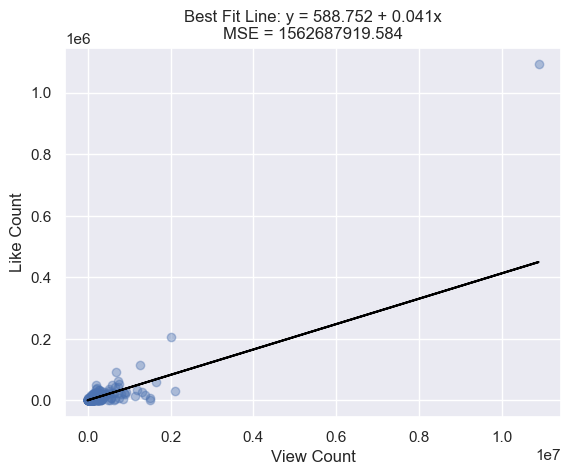

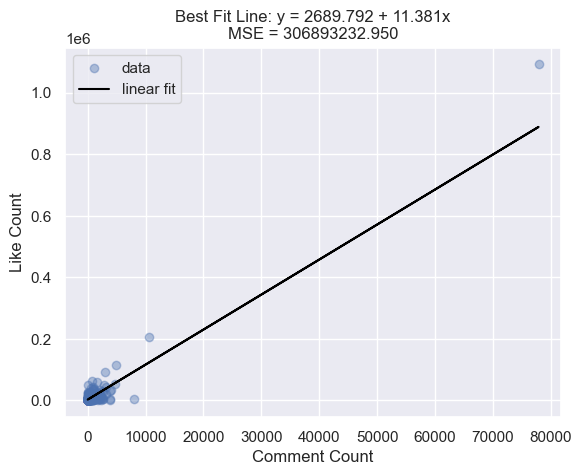

In [18]:
# View Count -> Like Count
show_fit_view_like(X_view_like, y_like, coefficients_view_like[1], coefficients_view_like[0])

# Comment Count -> Like Count
show_fit_comment_like(X_comment_like, y_like2, coefficients_comment_like[1], coefficients_comment_like[0])

Bit of off scale, we will delete the outlier and scale it and check again.

In [19]:
X_view_like = np.array(X_view_like).ravel()  
y_like = np.array(y_like).ravel()  
X_comment_like = np.array(X_comment_like).ravel()  
y_like2 = np.array(y_like2).ravel() 

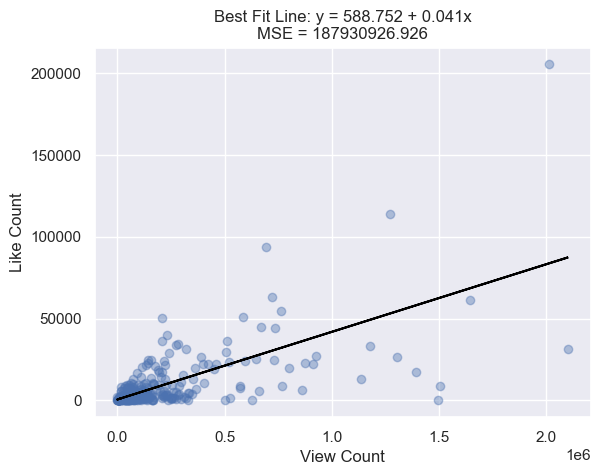

In [20]:
# View Count -> Like Count: Remove outliers
X_view_like = np.array(X_view_like).ravel()  # Flatten the array
y_like = np.array(y_like).ravel()  # Flatten the array

view_threshold = 1e7  
like_threshold = 1e6  

mask_view = (X_view_like < view_threshold) & (y_like < like_threshold)
filtered_X_view = X_view_like[mask_view]
filtered_y_like = y_like[mask_view]

# Replot without the outlier for View Count -> Like Count
show_fit_view_like(filtered_X_view, filtered_y_like, coefficients_view_like[1], coefficients_view_like[0])

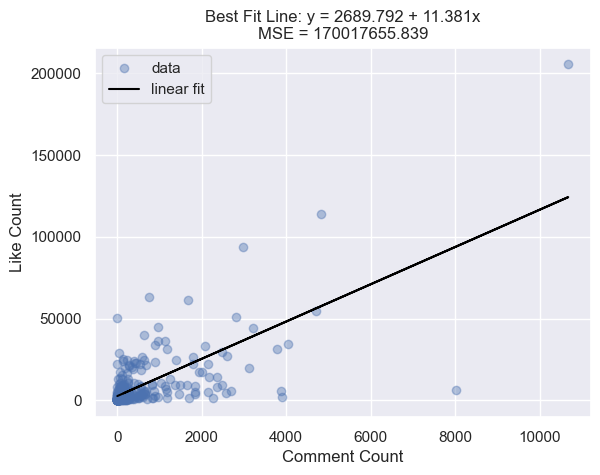

In [21]:
# Comment Count -> Like Count: Remove outliers
X_comment_like = np.array(X_comment_like).ravel()  
y_like2 = np.array(y_like2).ravel()  

comment_threshold = 8e4  
like2_threshold = 1e6  

mask_comment = (X_comment_like < comment_threshold) & (y_like2 < like2_threshold)
filtered_X_comment = X_comment_like[mask_comment]
filtered_y_like2 = y_like2[mask_comment]

# Replot without the outlier for Comment Count -> Like Count
show_fit_comment_like(filtered_X_comment, filtered_y_like2, coefficients_comment_like[1], coefficients_comment_like[0])

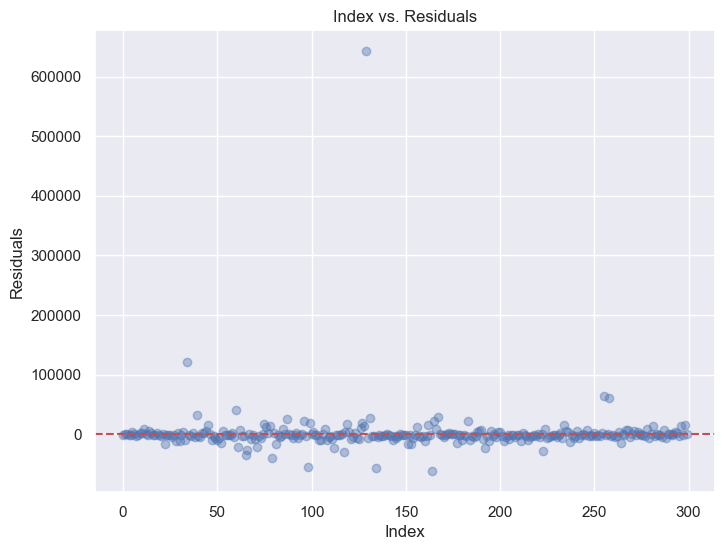

In [22]:
# View Count -> Like Count
results_view_like = linreg_predict(X_view_like, y_like, coefficients_view_like)
residuals = results_view_like['resids']

# Independence Check: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Index vs. Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

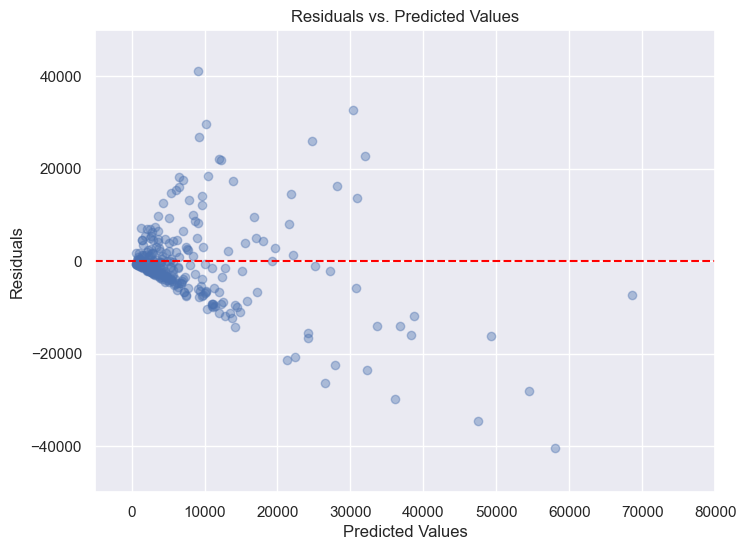

In [23]:
# Constant variance/linearity: Residuals vs. Predicted Values 
plt.figure(figsize=(8, 6))
plt.scatter(results_view_like['ypreds'], residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(left=-5000, right=80000)  
plt.ylim(bottom=-50000, top=50000)  
plt.show()

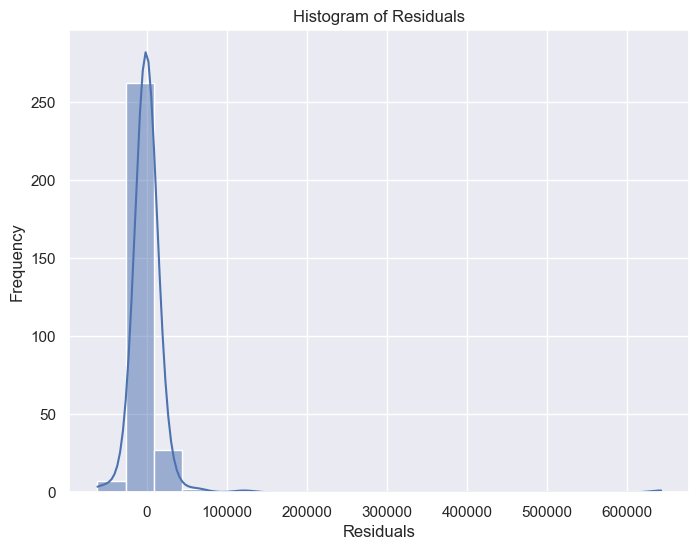

In [24]:
# Normality: Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

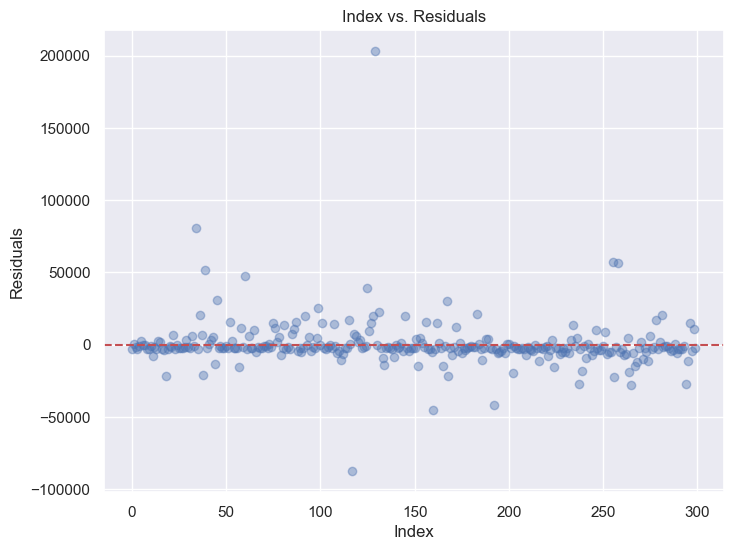

In [25]:
# Comment Count → Like Count
results_comment_like = linreg_predict(X_comment_like, y_like2, coefficients_comment_like)
residuals = results_comment_like['resids']

# Independence Check: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Index vs. Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

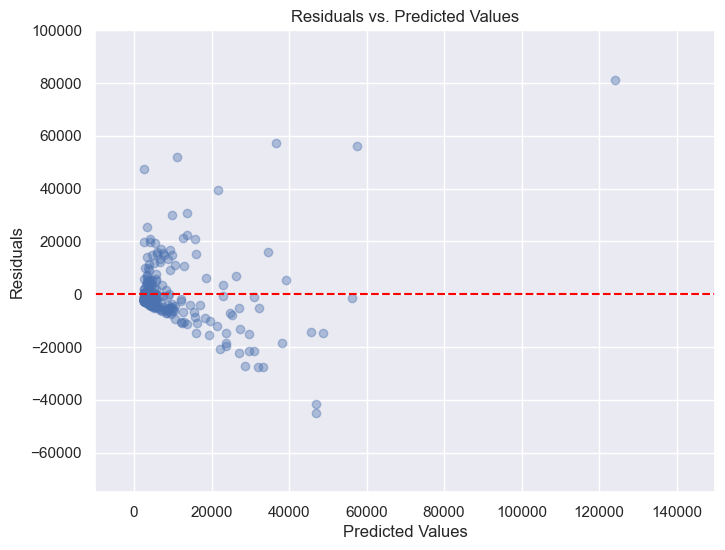

In [26]:
# Constant variance/linearity: Residuals vs. Predicted Values 
plt.figure(figsize=(8, 6))
plt.scatter(results_comment_like['ypreds'], residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim(left=-10000, right=150000)   
plt.ylim(bottom=-75000, top=100000)  
plt.show()

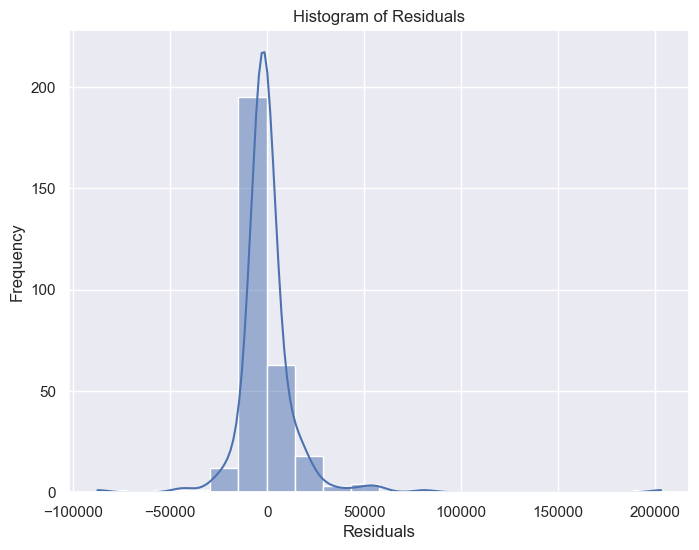

In [27]:
# Normality: Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Multiple Regression Model
Because we have two features(view count and comment count) to predict time count, we think use a multiple regression model is better than a linear regression model, so we try to implement a multiple regression model. We use both the view count and comment count together to predict like count.

In [28]:
df1500.dropna(inplace=True)

# Prepare data for multiple linear regression
# Focusing on 'View Count' and 'Comment Count'
x_feat_list = ['View Count', 'Comment Count']

In [29]:
# Extract X and y
X = df1500[x_feat_list].values
y = df1500['Like Count'].values

# Standardize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Print the first row in standardized X to see the difference
print("Standardized Features (First Row):", X_standardized[0])

Standardized Features (First Row): [-0.35186916 -0.17531735]


In [30]:
# Split the standardized data into training and testing sets with a 70-30 split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

In [31]:
# Fit the model using line_of_best_fit function
model_full = line_of_best_fit(Xtrain, ytrain)

# Predict and evaluate the model on the test set
results = linreg_predict(Xtest, ytest, model_full)

# Extract and print MSE and R^2 values
mse = results['mse']
r2 = results['r2']

# Print MSE and R^2 values for evaluation
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 756836257.1618061
R^2 Score: 0.9420770544286462


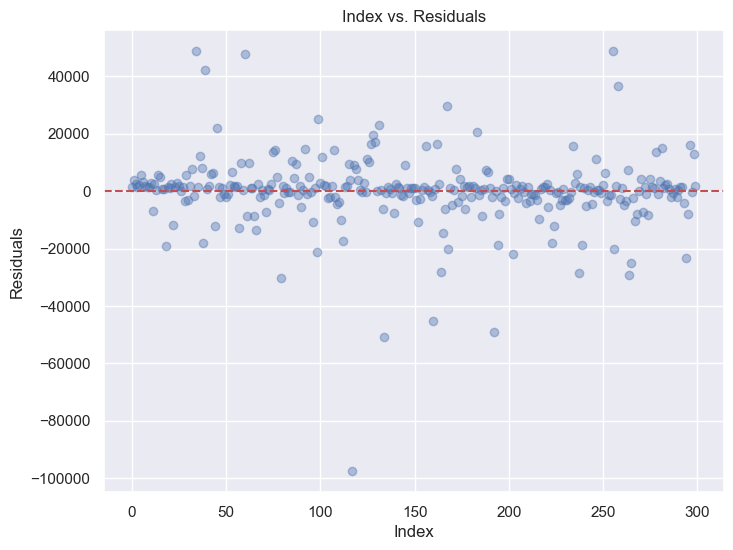

In [32]:
# Fit the full model to the entire dataset
model_full = line_of_best_fit(X_standardized, y)

# Generate predictions and residuals
results_full = linreg_predict(X_standardized, y, model_full)
residuals = results_full['resids']

# Independence Check: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Index vs. Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

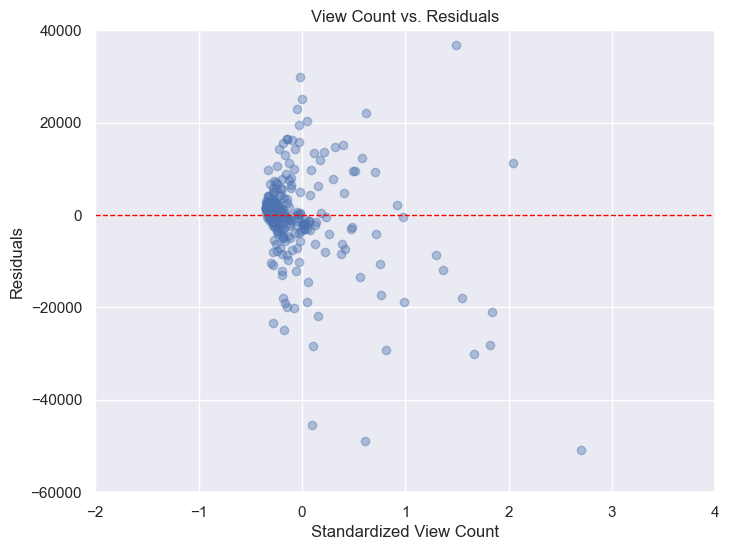

In [33]:
# Plot View Count vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(X_standardized[:, 0], residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('View Count vs. Residuals')
plt.xlabel('Standardized View Count')
plt.ylabel('Residuals')
plt.xlim(left=-2, right=4)   
plt.ylim(bottom=-60000, top=40000)    
plt.show()

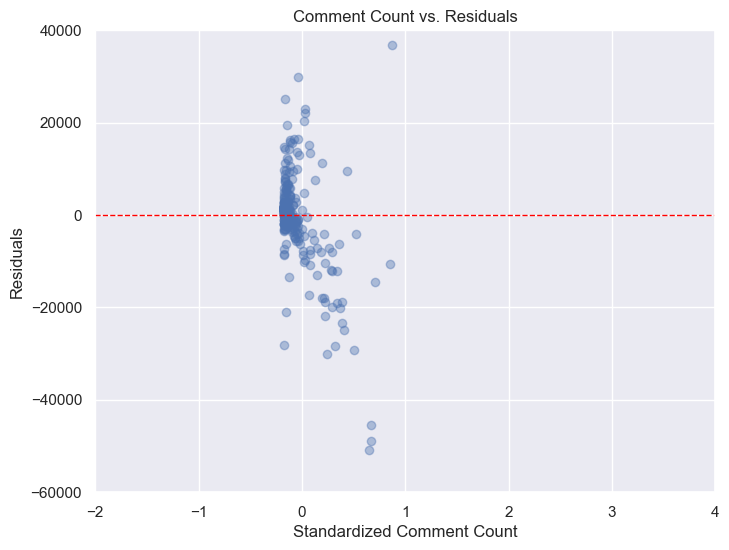

In [34]:
# Plot View Count vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(X_standardized[:, 1], residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Comment Count vs. Residuals')
plt.xlabel('Standardized Comment Count')
plt.ylabel('Residuals')
plt.xlim(left=-2, right=4)   
plt.ylim(bottom=-60000, top=40000)    
plt.show()

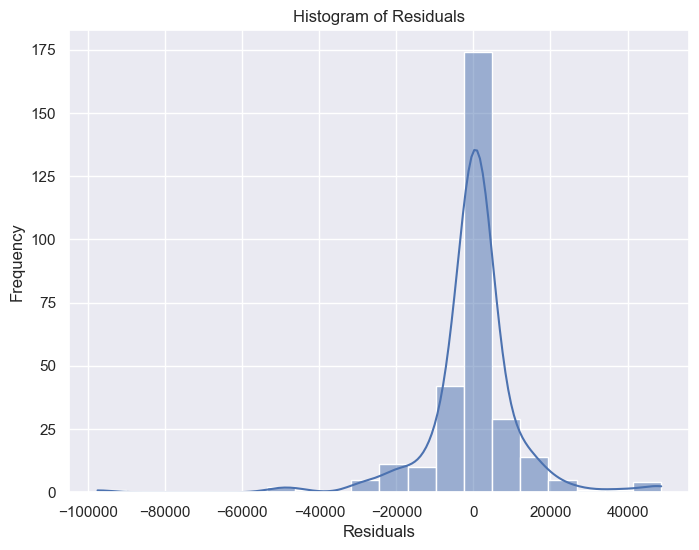

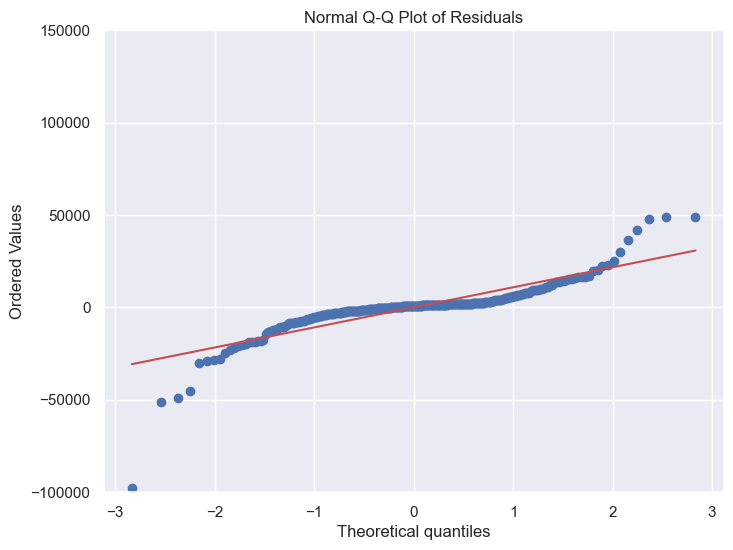

In [35]:
# Histogram and Q-Q Plot of residuals
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Normal probability plot: Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Residuals')
plt.ylim(bottom=-100000, top=150000) 
plt.show()

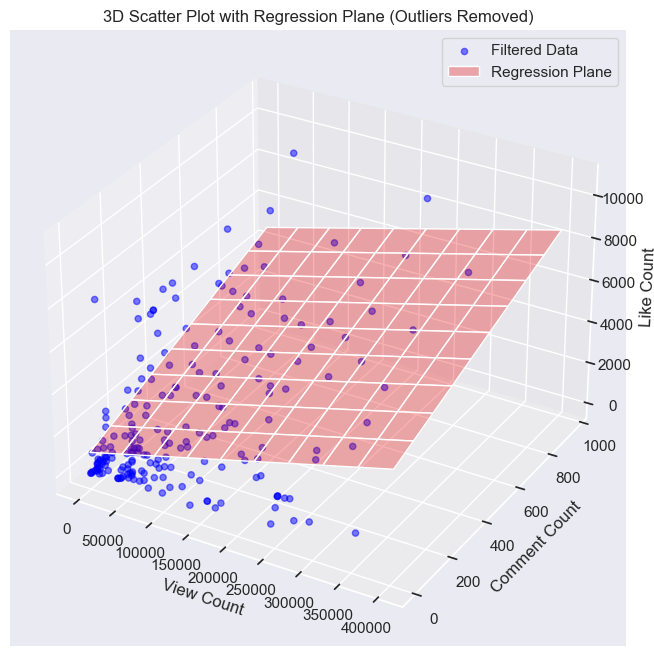

In [36]:
df1500.dropna(inplace=True)
# When I first generate the multiple regression model, there is only one outlier which is 
# extremely high, it needs to remove for the performance of this model

# Remove outliers 
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df1500 = remove_outliers(df1500, ['View Count', 'Comment Count', 'Like Count'])

# Prepare the feature matrix (X) and target vector (y)
x_feat_list = ['View Count', 'Comment Count']
X = df1500[x_feat_list].values  
y = df1500['Like Count'].values  

# Add a bias column to X (intercept term)
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Compute the weights using the Normal Equation
# w = (X^T * X)^(-1) * X^T * y
w = np.dot(np.linalg.inv(np.dot(X_bias.T, X_bias)), np.dot(X_bias.T, y))

# Create a meshgrid for the regression plane
view_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
comment_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
view_grid, comment_grid = np.meshgrid(view_range, comment_range)

# Predict values for the grid
X_grid = np.c_[np.ones(view_grid.ravel().shape), view_grid.ravel(), comment_grid.ravel()]
y_pred_grid = np.dot(X_grid, w)
y_pred_grid = y_pred_grid.reshape(view_grid.shape)

# Plot the data and regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.5, label='Filtered Data')

# Plot the regression plane
ax.plot_surface(view_grid, comment_grid, y_pred_grid, color='red', alpha=0.3, label='Regression Plane')

# Setting labels
ax.set_xlabel('View Count')
ax.set_ylabel('Comment Count')
ax.set_zlabel('Like Count')
ax.set_title('3D Scatter Plot with Regression Plane (Outliers Removed)')

plt.legend()
plt.show()

## A discussion of the preliminary results

#### Overview of Results
The analysis explores the relationships between YouTube session data metrics using regression model, I tried two models: linear regression model and multiple regression model:

1. View Count → Like Count (Linear regression Model)  
   - Mean Squared Error (MSE): 4,723,798,193.90  
   - R² Score: 0.6385  
   - Interpretation: View Count explains approximately 64% of the variance in Like Count, indicating a moderate linear relationship. However, the residual patterns suggest violations of model assumptions.

2. Comment Count → Like Count (Linear regression Model)**  
   - Mean Squared Error (MSE): 570,391,861.56  
   - R² Score: 0.9563  
   - Interpretation: Comment Count is a very strong predictor of Like Count, explaining 95.6% of the variance. This suggests a strong linear relationship, although further evaluation of residuals is needed.

3. View Count + Comment Count → Like Count (Multiple regression Model)
   - Mean Squared Error (MSE): 75,683,6257.16  
   - R² Score: 0.9421  
   - Interpretation: The multiple regression model achieves a strong fit, with an R² of 0.9421, providing a more comprehensive understanding of Like Count predictors.
  
Given that the multiple regression model considers both features (View Count and Comment Count) together, it provides a balanced approach to capturing the relationships in the data and has a high R^2 and lower MSE. For this reason, we chose the multiple regression model as our first ML model. Although both single-predictor models meet key assumptions, combining the features ensures better generalizability and robustness.

#### Generated Plots for Visualization
I generated many plots in the last parts:

1. Linear Regression Model:
   - View Count → Like Count: A scatterplot with a regression line illustrates the relationship between View Count and Like Count. The plot shows a moderate linear relationship, with some deviations at higher View Count values. Residual plots highlight heteroscedasticity and potential violations of assumptions.
   - Comment Count → Like Count: The scatterplot with a regression line reveals a much stronger linear relationship, consistent with the high R² value. The residual of this model is more consistent with the assumptions compared to the View Count model.

2. Multiple Regression Model:
   - The Residual plots were used to assess model assumptions. These plots revealed minor violations, particularly at extreme values of predicted Like Count.
   - The Actual vs. Predicted Values Plot: It demonstrates the overall performance of the model, showing how closely predicted Like Count values align with actual values.
   - Histogram of Residuals: A histogram was generated to evaluate the distribution of residuals. 

#### Checking of Assumptions

1. Linearity:  
   - Linear Regression Model: The scatterplots suggest that the relationship between View Count and Like Count is moderately linear, while Comment Count shows a much stronger linear relationship.  
   - Multiple Regression Model: The multiple regression model captures the relationships between Like Count and both predictors (View Count and Comment Count) more comprehensively by incorporating both features together. This improves the model's ability to explain variability.

2. Homoscedasticity: Residual plots for all models reveal evidence of heteroscedasticity, particularly at higher predicted values, where residuals tend to have larger variances. This indicates violations of the constant variance assumption and suggests that transformations to address this.

3. Normality of Residuals: Residual histograms indicate slight deviations from normality in all models. The deviations are most pronounced in the Linear Regression View Count model, where skewness and heavy tails are observed. These deviations suggest that transformations may help achieve residuals closer to a normal distribution, improving both assumptions.

4. Independence: Residual plots suggest potential violations of independence, as the residuals are not evenly distributed around zero. This could be due to unmeasured factors or relationships between predictors that are not captured by the model.

#### Measures of Model Fit

- View Count → Like Count: This model demonstrates moderate fit, with an R² of 0.6385. While View Count provides valuable information, its predictive power is weaker compared to Comment Count.

- Comment Count → Like Count: This model shows good fit, with an R² of 0.9563, indicating a very strong linear relationship.

- View Count + Comment Count → Like Count: The multiple regression model maintains a high R² (0.9421), demonstrating that combining the two predictors provides a robust explanation of variability in Like Count.

We chose the multiple regression model because it incorporates more predictors, ensuring a comprehensive approach to modeling Like Count. This is crucial since Like Count is influenced by multiple factors, and relying on a single predictor would oversimplify the relationship. By considering both View Count and Comment Count, the multiple regression model ensures better generalizability and accounts for more variability in Like Count.

#### Ethical Considerations

1. The dataset may overrepresent certain types of content, creators, or video categories. This could lead to biased models that unfairly favor specific genres or creators.

2. Our dataset contains video IDs creators, it could lead to privacy violations.

3. Models based on engagement metrics like comments and views could inadvertently favor content designed to maximize these metrics, potentially disadvantaging smaller creators.